<a href="https://colab.research.google.com/github/pranjaliborse2/Small-scale-projects/blob/main/CV_HurricaneDamage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d kmader/satellite-images-of-hurricane-damage

Dataset URL: https://www.kaggle.com/datasets/kmader/satellite-images-of-hurricane-damage
License(s): Attribution 4.0 International (CC BY 4.0)
 71% 45.0M/63.0M [00:00<00:00, 54.4MB/s]
100% 63.0M/63.0M [00:00<00:00, 73.0MB/s]


In [2]:
!unzip /content/satellite-images-of-hurricane-damage.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_another/no_damage/-95.627453_29.859303000000004.jpeg  
  inflating: train_another/no_damage/-95.62745600000001_29.777524.jpeg  
  inflating: train_another/no_damage/-95.627485_29.777865999999996.jpeg  
  inflating: train_another/no_damage/-95.62751800000001_29.857785999999997.jpeg  
  inflating: train_another/no_damage/-95.62751999999999_29.860796999999998.jpeg  
  inflating: train_another/no_damage/-95.627523_29.770004999999998.jpeg  
  inflating: train_another/no_damage/-95.62753000000001_29.863289.jpeg  
  inflating: train_another/no_damage/-95.627539_29.827047999999998.jpeg  
  inflating: train_another/no_damage/-95.627543_29.860021000000003.jpeg  
  inflating: train_another/no_damage/-95.627563_29.8628.jpeg  
  inflating: train_another/no_damage/-95.627579_29.864051.jpeg  
  inflating: train_another/no_damage/-95.627595_29.776602.jpeg  
  inflating: train_another/no_damage/-95.62759799999999_29.777317.jpeg  
  i

In [3]:
import numpy as np
import pandas as pd
import os
import cv2 #OpenCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten, Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
traindamage_path = "/content/train_another/damage"
trainnodamage_path ="/content/train_another/no_damage"
testdamage_path = "/content/test/damage"
testnodamage_path = "/content/test/no_damage"
valdamage_path = "/content/validation_another/damage"
valnodamage_path = "/content/validation_another/no_damage"

(128, 128, 3)


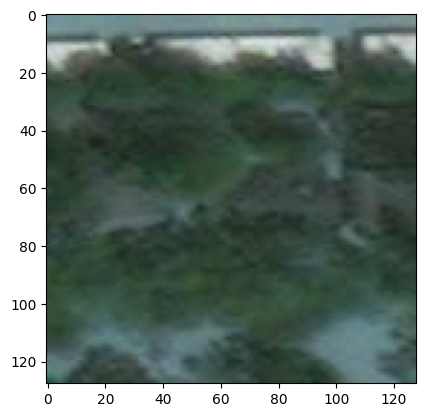

(128, 128, 3)


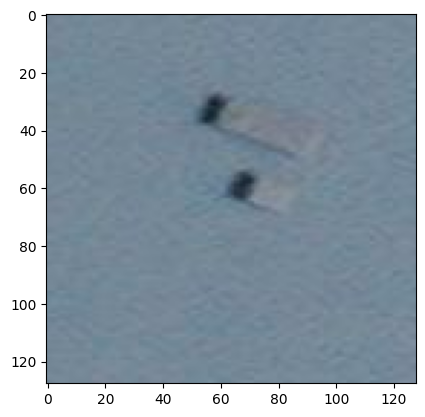

(128, 128, 3)


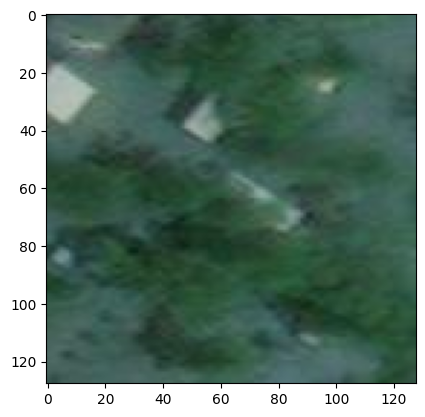

(128, 128, 3)


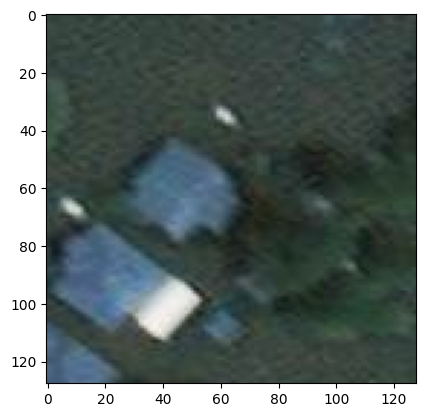

(128, 128, 3)


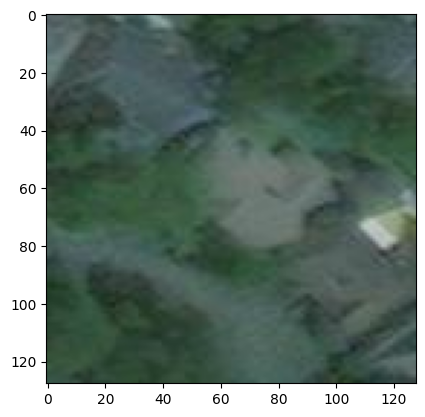

In [5]:
#Damage Images
for img in os.listdir(traindamage_path)[5:10]:
  try:
    img_array = cv2.imread(os.path.join(traindamage_path,img))
    print(img_array.shape)
    plt.imshow(img_array.astype(float)/255)
    plt.show()
  except:
    pass

In [6]:
data = []
data1=[]
data2 = []
def get_data(file_path,class_num, data):
    for img in os.listdir(file_path):
        try:
            img_array = cv2.imread(os.path.join(file_path,img))
            data.append([img_array, class_num])
        except:
            pass
get_data(traindamage_path,0,data)
get_data(trainnodamage_path,1,data)
get_data(testdamage_path,0,data1)
get_data(testnodamage_path,1,data1)
get_data(valdamage_path,0,data2)
get_data(valnodamage_path,1,data2)

In [7]:
random.shuffle(data)
random.shuffle(data1)
random.shuffle(data2)

In [8]:
X = []
y = []
X1=[]
y1=[]
X2=[]
y2=[]
for i in data:
    X.append(i[0])
    y.append(i[1])
for j in data1:
    X1.append(j[0])
    y1.append(j[1])
for k in data2:
    X2.append(k[0])
    y2.append(k[1])


In [9]:
X = np.array(X).reshape(-1,128,128,3)
y = np.array(y)
X1 = np.array(X1).reshape(-1,128,128,3)
y1 = np.array(y1)
X2 = np.array(X2).reshape(-1,128,128,3)
y2 = np.array(y2)

In [10]:
print(X.shape)
print(X1.shape)
print(X2.shape)

(10000, 128, 128, 3)
(2000, 128, 128, 3)
(2000, 128, 128, 3)


In [12]:
model = models.Sequential([

  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu', input_shape=(128,128,3)),
  layers.BatchNormalization(),
  layers.AveragePooling2D(),

  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(1028, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X,y, validation_data=(X1, y1), epochs=15)

Epoch 1/15
313/313 [==============================] - 20s 34ms/step - loss: 0.3046 - accuracy: 0.8617 - val_loss: 0.3670 - val_accuracy: 0.8550
Epoch 2/15
313/313 [==============================] - 9s 29ms/step - loss: 0.1601 - accuracy: 0.9388 - val_loss: 0.2890 - val_accuracy: 0.8750
Epoch 3/15
313/313 [==============================] - 10s 31ms/step - loss: 0.1366 - accuracy: 0.9508 - val_loss: 0.1702 - val_accuracy: 0.9245
Epoch 4/15
313/313 [==============================] - 10s 31ms/step - loss: 0.1156 - accuracy: 0.9574 - val_loss: 0.4190 - val_accuracy: 0.8675
Epoch 5/15
313/313 [==============================] - 9s 30ms/step - loss: 0.0948 - accuracy: 0.9646 - val_loss: 0.2540 - val_accuracy: 0.8990
Epoch 6/15
313/313 [==============================] - 9s 30ms/step - loss: 0.0737 - accuracy: 0.9729 - val_loss: 0.1405 - val_accuracy: 0.9530
Epoch 7/15
313/313 [==============================] - 10s 31ms/step - loss: 0.0723 - accuracy: 0.9731 - val_loss: 0.3108 - val_accuracy: 0.

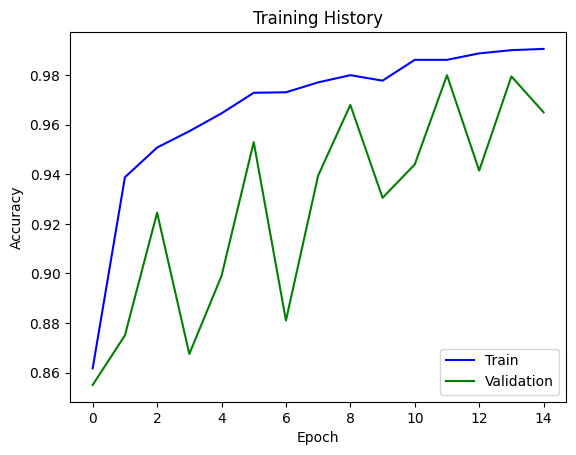

In [15]:
#visualize the training vs the validation accuracy of the model
plt.plot(history.history['accuracy'], c="b")
plt.plot(history.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [16]:
model.evaluate(X2,y2)

63/63 [==============================] - 1s 9ms/step - loss: 0.1760 - accuracy: 0.9590


[0.17603839933872223, 0.9589999914169312]

In [17]:
predictions = model.predict(X2)

63/63 [==============================] - 1s 8ms/step


In [18]:
y2

array([1, 1, 0, ..., 0, 1, 0])

<Axes: >

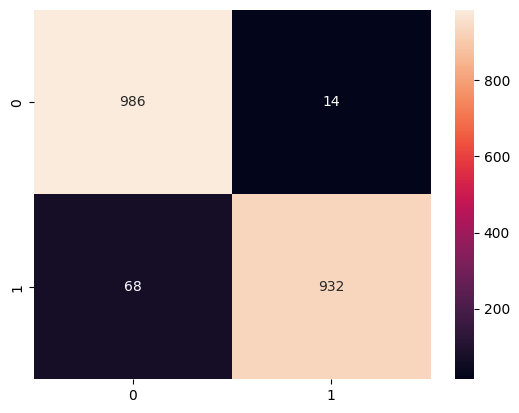

In [19]:
cm = tf.math.confusion_matrix(labels=y2, predictions= np.round(predictions).tolist())
sns.heatmap(cm,annot=True, fmt='d')